In [1]:
# TODO LIST
# Read
# Display
# * Convert to grayscale
# * Convert to RGB
# Crop
# Resize
# Flip
# Split channels

# For more on colorspaces: look into HSV/HSB, LAB

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import glob
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# List all files in data dir
image_paths = glob.glob("data/*")
print(image_paths)

image_path = "data/catdog.png"

['data/catdog.png', 'data/catdog.jpg']


<IPython.core.display.Javascript object>

In [4]:
# Pixels range from 0 - 255
# black - white

# BGR
# (0, 0, 0) - (255, 255, 255)

# Grayscale
# 0 - 255

<IPython.core.display.Javascript object>

In [5]:
image = cv2.imread(image_path)

# Image is in BGR format in OpenCV by default
print(image.shape)
# (1091, 920, 3)
# (height, width, depth)

print(image.dtype)

(1091, 920, 3)
uint8


<IPython.core.display.Javascript object>

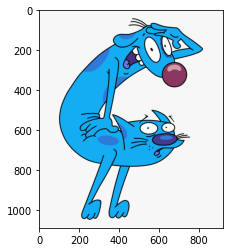

<IPython.core.display.Javascript object>

In [6]:
# Colors are off because we are in BGR and matplotlib expects RGB
plt.imshow(image)
plt.show()

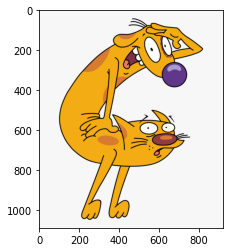

<IPython.core.display.Javascript object>

In [7]:
# Convert to rgb for display
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.show()

In [8]:
def imshow_cv2plt(bgr_img):
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()

<IPython.core.display.Javascript object>

(1091, 920)


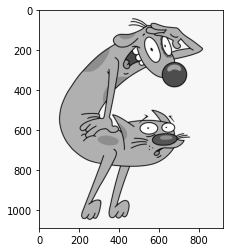

<IPython.core.display.Javascript object>

In [9]:
# Weighted average of channels (green is more important to human eye rods/cones/bio bs)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)

plt.imshow(gray, cmap="gray")
plt.show()

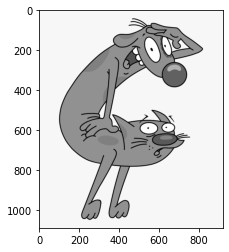

<IPython.core.display.Javascript object>

In [10]:
# Manual grayscale taking uniformly weighted average
manual_gray = image.mean(axis=2)

plt.imshow(manual_gray, cmap="gray")
plt.show()

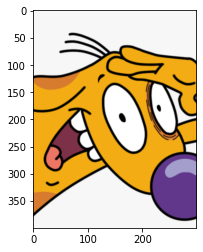

<IPython.core.display.Javascript object>

In [11]:
cropped = image[:400, 400:700]
imshow_cv2plt(cropped)

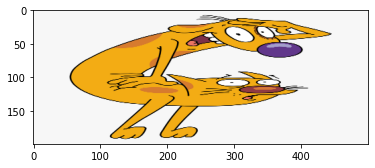

<IPython.core.display.Javascript object>

In [12]:
# def resize(img, width, height)
width = 500
height = 200

resized = cv2.resize(image, (width, height))
imshow_cv2plt(resized)

In [13]:
h, w = image.shape[:2]
aspect_ratio = w / h
aspect_ratio

0.843263061411549

<IPython.core.display.Javascript object>

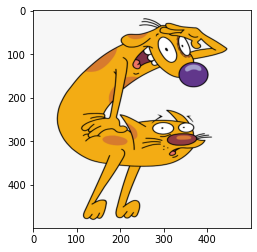

<IPython.core.display.Javascript object>

In [14]:
# known: w, h, either new_h/new_w
# w / h = new_w / new_h


def resize(img, width=None, height=None):
    h, w = img.shape[:2]

    if width is not None and height is not None:
        pass
    elif width is not None:
        height = width * (h / w)
        height = round(height)
    elif height is not None:
        width = height * (w / h)
        width = round(width)
    else:
        raise ValueError("No dimensions provided")

    resized = cv2.resize(image, (width, height))
    return resized


resized = resize(image, width=500, height=500)
imshow_cv2plt(resized)

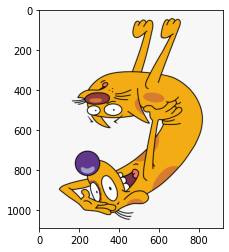

<IPython.core.display.Javascript object>

In [15]:
#  1 flip horizontally / flip around the y axis
#  0 flip vertically / flip around the x axis
#  -1 flip vertical and horizontal / flip around both axes
flipped = cv2.flip(image, -1)
imshow_cv2plt(flipped)

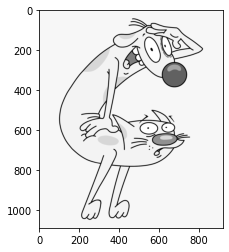

<IPython.core.display.Javascript object>

In [16]:
b, g, r = cv2.split(image)

plt.imshow(r, cmap="gray")
plt.show()

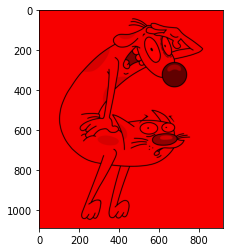

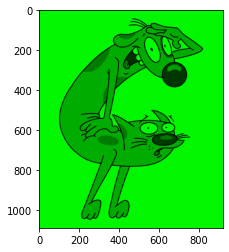

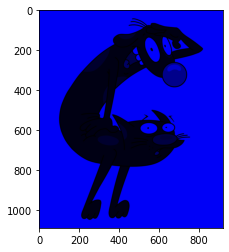

<IPython.core.display.Javascript object>

In [17]:
# This cant be best practice, look up a better way it you want to do this
red = image.copy()
# zero out blue/green channels
red[:, :, :2] = 0
imshow_cv2plt(red)

green = image.copy()
# zero out blue/red channels
green[:, :, 0] = 0
green[:, :, 2] = 0
imshow_cv2plt(green)

blue = image.copy()
# zero out green/red channels
blue[:, :, 1:] = 0
imshow_cv2plt(blue)